In [19]:
!pip install furo
#!pip install graphviz
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install prettytable
!pip install scikit-learn
!pip install scipy
!pip install setuptools
!pip install sphinx-gallery
!pip install sphinxemoji
!pip install termcolor
!pip install pydotplus
#!winget install -e --id Graphviz.Graphviz

!pip install trustee --user

^C
^C


In [13]:
import numpy as np
import csv
import pandas as pd
import os
import shutil
import joblib
import pydotplus
import graphviz

from sklearn import tree

from trustee import ClassificationTrustee
from trustee.utils.tree import get_dt_info, top_k_prune

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion

# SVM & PCA

In [4]:
## PCA SVM

# Load the df
df = pd.read_csv("df_pca.csv")

y = df['feature_0']
X = df.drop(columns = ['feature_0'], inplace = False)

# Split the data into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the SVM classifier - pca
svm_classifier = SVC(kernel='linear')

# Perform 3-fold cross-validation on the training data
#kfold = KFold(n_splits=3, shuffle=True, random_state=42)
#cross_val_scores = cross_val_score(svm_classifier, X_train, y_train, cv=kfold)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier on the cross-validation set
#cv_score = cross_val_scores.mean()

#print("Mean cross-validation accuracy:", cv_score)

# Evaluate the classifier on the test set
test_score = svm_classifier.score(X_test, y_test)
print("Test set accuracy:", test_score)

Test set accuracy: 0.9783677482792527


In [16]:
"""
# Define a pipeline to handle feature extraction and classification
svmPipeline = Pipeline([
    ('classifier', svm_classifier)      # Apply SVM classifier
])

# Train the classifier on the training set
svmPipeline.fit(X_train, y_train)

# Evaluate the classifier on the test set
test_score = svmPipeline.score(X_test, y_test)
print("Test set accuracy:", test_score)


# Evaluate the classifier on the test set
y_pred = svmPipeline.predict(X_test)

# Generate a classification report
#print(classification_report(y_test, y_pred, labels=['white','black']))
"""

Test set accuracy: 0.9783677482792527


In [18]:
 #joblib.dump(svm_classifier, 'quic_text_svm_pca.joblib') # put model here to export

['quic_text_rf.joblib']

In [ ]:
y_pred = svm_classifier.predict(X_test)

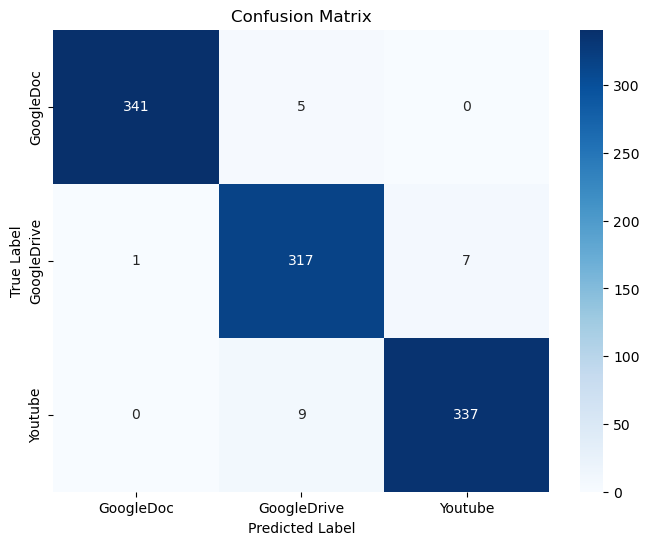

In [17]:
# Generate the confusion matrix
category_labels = ['GoogleDoc', 'GoogleDrive', 'Youtube']
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=category_labels, yticklabels=category_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Trustee

In [19]:
# Load the trained model
#svm_classifier = joblib.load('quic_text_svm_pca.joblib')

trustee = ClassificationTrustee(expert=svm_classifier)
trustee.fit(X_train, y_train, num_iter=50, num_stability_iter=10, samples_size=0.3, verbose=True)
dt, pruned_dt, agreement, reward = trustee.explain()
dt_y_pred = dt.predict(X_test)
pruned_dt_y_pred = pruned_dt.predict(X_test)

print("Model explanation global fidelity report:")
print(classification_report(y_pred, dt_y_pred))
print("Model explanation score report:")
print(classification_report(y_test, dt_y_pred))

Initializing training dataset using Pipeline(steps=[('classifier', SVC(kernel='linear'))]) as expert model
Expert model score: 0.9831467612040493
Initializing Trustee outer-loop with 10 iterations
########## Outer-loop Iteration 0/10 ##########
Initializing Trustee inner-loop with 10 iterations
########## Inner-loop Iteration 0/50 ##########
Sampling 498 points from training dataset with (1660, 1660) entries
Student model 0-0 trained with depth 6 and 10 leaves:
Student model score: 0.9816266329540665
Student model 0-0 fidelity: 0.9816266329540665
########## Inner-loop Iteration 1/50 ##########
Sampling 498 points from training dataset with (1810, 1810) entries
Student model 0-1 trained with depth 6 and 12 leaves:
Student model score: 0.9937924670749099
Student model 0-1 fidelity: 0.9937924670749099
########## Inner-loop Iteration 2/50 ##########
Sampling 498 points from training dataset with (1960, 1960) entries
Student model 0-2 trained with depth 6 and 12 leaves:
Student model score:

Student model 0-35 trained with depth 4 and 11 leaves:
Student model score: 0.9863247863247864
Student model 0-35 fidelity: 0.9863247863247864
########## Inner-loop Iteration 36/50 ##########
Sampling 498 points from training dataset with (7060, 7060) entries
Student model 0-36 trained with depth 5 and 10 leaves:
Student model score: 0.97410359386263
Student model 0-36 fidelity: 0.97410359386263
########## Inner-loop Iteration 37/50 ##########
Sampling 498 points from training dataset with (7210, 7210) entries
Student model 0-37 trained with depth 7 and 13 leaves:
Student model score: 0.9805868431084019
Student model 0-37 fidelity: 0.9805868431084019
########## Inner-loop Iteration 38/50 ##########
Sampling 498 points from training dataset with (7360, 7360) entries
Student model 0-38 trained with depth 4 and 8 leaves:
Student model score: 0.9791687248101139
Student model 0-38 fidelity: 0.9791687248101139
########## Inner-loop Iteration 39/50 ##########
Sampling 498 points from training

Student model 1-17 trained with depth 5 and 9 leaves:
Student model score: 0.9737373737373737
Student model 1-17 fidelity: 0.9737373737373737
########## Inner-loop Iteration 18/50 ##########
Sampling 498 points from training dataset with (11860, 11860) entries
Student model 1-18 trained with depth 5 and 9 leaves:
Student model score: 0.9541908185975982
Student model 1-18 fidelity: 0.9541908185975982
########## Inner-loop Iteration 19/50 ##########
Sampling 498 points from training dataset with (12010, 12010) entries
Student model 1-19 trained with depth 6 and 12 leaves:
Student model score: 0.9627602584250043
Student model 1-19 fidelity: 0.9627602584250043
########## Inner-loop Iteration 20/50 ##########
Sampling 498 points from training dataset with (12160, 12160) entries
Student model 1-20 trained with depth 5 and 8 leaves:
Student model score: 0.9735228539576366
Student model 1-20 fidelity: 0.9735228539576366
########## Inner-loop Iteration 21/50 ##########
Sampling 498 points from 

Student model 2-2 fidelity: 0.9636396624348431
########## Inner-loop Iteration 3/50 ##########
Sampling 498 points from training dataset with (17110, 17110) entries
Student model 2-3 trained with depth 6 and 12 leaves:
Student model score: 0.97458535418283
Student model 2-3 fidelity: 0.97458535418283
########## Inner-loop Iteration 4/50 ##########
Sampling 498 points from training dataset with (17260, 17260) entries
Student model 2-4 trained with depth 5 and 10 leaves:
Student model score: 0.9803055246976689
Student model 2-4 fidelity: 0.9803055246976689
########## Inner-loop Iteration 5/50 ##########
Sampling 498 points from training dataset with (17410, 17410) entries
Student model 2-5 trained with depth 5 and 9 leaves:
Student model score: 0.9713915869378055
Student model 2-5 fidelity: 0.9713915869378055
########## Inner-loop Iteration 6/50 ##########
Sampling 498 points from training dataset with (17560, 17560) entries
Student model 2-6 trained with depth 7 and 11 leaves:
Student m

Student model 2-37 trained with depth 4 and 7 leaves:
Student model score: 0.9788939624556062
Student model 2-37 fidelity: 0.9788939624556062
########## Inner-loop Iteration 38/50 ##########
Sampling 498 points from training dataset with (22360, 22360) entries
Student model 2-38 trained with depth 5 and 12 leaves:
Student model score: 0.9604407219433427
Student model 2-38 fidelity: 0.9604407219433427
########## Inner-loop Iteration 39/50 ##########
Sampling 498 points from training dataset with (22510, 22510) entries
Student model 2-39 trained with depth 4 and 9 leaves:
Student model score: 0.9859978794751258
Student model 2-39 fidelity: 0.9859978794751258
########## Inner-loop Iteration 40/50 ##########
Sampling 498 points from training dataset with (22660, 22660) entries
Student model 2-40 trained with depth 5 and 10 leaves:
Student model score: 0.9784078144078143
Student model 2-40 fidelity: 0.9784078144078143
########## Inner-loop Iteration 41/50 ##########
Sampling 498 points from

Student model 3-19 trained with depth 6 and 10 leaves:
Student model score: 1.0
Student model 3-19 fidelity: 1.0
########## Inner-loop Iteration 20/50 ##########
Sampling 498 points from training dataset with (27160, 27160) entries
Student model 3-20 trained with depth 5 and 9 leaves:
Student model score: 0.9670327047679054
Student model 3-20 fidelity: 0.9670327047679054
########## Inner-loop Iteration 21/50 ##########
Sampling 498 points from training dataset with (27310, 27310) entries
Student model 3-21 trained with depth 8 and 14 leaves:
Student model score: 0.937206548241031
Student model 3-21 fidelity: 0.937206548241031
########## Inner-loop Iteration 22/50 ##########
Sampling 498 points from training dataset with (27460, 27460) entries
Student model 3-22 trained with depth 5 and 12 leaves:
Student model score: 0.9736701405851381
Student model 3-22 fidelity: 0.9736701405851381
########## Inner-loop Iteration 23/50 ##########
Sampling 498 points from training dataset with (27610, 

Student model 4-2 fidelity: 0.9870440251572328
########## Inner-loop Iteration 3/50 ##########
Sampling 498 points from training dataset with (32110, 32110) entries
Student model 4-3 trained with depth 5 and 10 leaves:
Student model score: 0.9509971857728953
Student model 4-3 fidelity: 0.9509971857728953
########## Inner-loop Iteration 4/50 ##########
Sampling 498 points from training dataset with (32260, 32260) entries
Student model 4-4 trained with depth 4 and 11 leaves:
Student model score: 0.9483418310871334
Student model 4-4 fidelity: 0.9483418310871334
########## Inner-loop Iteration 5/50 ##########
Sampling 498 points from training dataset with (32410, 32410) entries
Student model 4-5 trained with depth 5 and 8 leaves:
Student model score: 0.9654406251650034
Student model 4-5 fidelity: 0.9654406251650034
########## Inner-loop Iteration 6/50 ##########
Sampling 498 points from training dataset with (32560, 32560) entries
Student model 4-6 trained with depth 5 and 9 leaves:
Studen

Student model 4-36 trained with depth 4 and 6 leaves:
Student model score: 0.9502788955665883
Student model 4-36 fidelity: 0.9502788955665883
########## Inner-loop Iteration 37/50 ##########
Sampling 498 points from training dataset with (37210, 37210) entries
Student model 4-37 trained with depth 4 and 10 leaves:
Student model score: 0.9725266913461023
Student model 4-37 fidelity: 0.9725266913461023
########## Inner-loop Iteration 38/50 ##########
Sampling 498 points from training dataset with (37360, 37360) entries
Student model 4-38 trained with depth 4 and 9 leaves:
Student model score: 0.973180722590636
Student model 4-38 fidelity: 0.973180722590636
########## Inner-loop Iteration 39/50 ##########
Sampling 498 points from training dataset with (37510, 37510) entries
Student model 4-39 trained with depth 4 and 7 leaves:
Student model score: 0.9925844436295481
Student model 4-39 fidelity: 0.9925844436295481
########## Inner-loop Iteration 40/50 ##########
Sampling 498 points from tr

Student model 5-18 trained with depth 6 and 10 leaves:
Student model score: 0.9416051057842102
Student model 5-18 fidelity: 0.9416051057842102
########## Inner-loop Iteration 19/50 ##########
Sampling 498 points from training dataset with (42010, 42010) entries
Student model 5-19 trained with depth 5 and 9 leaves:
Student model score: 0.9646973988324862
Student model 5-19 fidelity: 0.9646973988324862
########## Inner-loop Iteration 20/50 ##########
Sampling 498 points from training dataset with (42160, 42160) entries
Student model 5-20 trained with depth 5 and 11 leaves:
Student model score: 0.9537756433450654
Student model 5-20 fidelity: 0.9537756433450654
########## Inner-loop Iteration 21/50 ##########
Sampling 498 points from training dataset with (42310, 42310) entries
Student model 5-21 trained with depth 7 and 15 leaves:
Student model score: 0.9514906477170628
Student model 5-21 fidelity: 0.9514906477170628
########## Inner-loop Iteration 22/50 ##########
Sampling 498 points fro

Student model 6-1 trained with depth 4 and 8 leaves:
Student model score: 0.9698509485094852
Student model 6-1 fidelity: 0.9698509485094852
########## Inner-loop Iteration 2/50 ##########
Sampling 498 points from training dataset with (46960, 46960) entries
Student model 6-2 trained with depth 4 and 8 leaves:
Student model score: 0.986766247379455
Student model 6-2 fidelity: 0.986766247379455
########## Inner-loop Iteration 3/50 ##########
Sampling 498 points from training dataset with (47110, 47110) entries
Student model 6-3 trained with depth 6 and 12 leaves:
Student model score: 0.9927695088650438
Student model 6-3 fidelity: 0.9927695088650438
########## Inner-loop Iteration 4/50 ##########
Sampling 498 points from training dataset with (47260, 47260) entries
Student model 6-4 trained with depth 6 and 11 leaves:
Student model score: 0.9855973941739546
Student model 6-4 fidelity: 0.9855973941739546
########## Inner-loop Iteration 5/50 ##########
Sampling 498 points from training data

Student model score: 0.9452582086853186
Student model 6-33 fidelity: 0.9452582086853186
########## Inner-loop Iteration 34/50 ##########
Sampling 498 points from training dataset with (51760, 51760) entries
Student model 6-34 trained with depth 5 and 11 leaves:
Student model score: 0.9859633569739952
Student model 6-34 fidelity: 0.9859633569739952
########## Inner-loop Iteration 35/50 ##########
Sampling 498 points from training dataset with (51910, 51910) entries
Student model 6-35 trained with depth 6 and 14 leaves:
Student model score: 0.9864328682108332
Student model 6-35 fidelity: 0.9864328682108332
########## Inner-loop Iteration 36/50 ##########
Sampling 498 points from training dataset with (52060, 52060) entries
Student model 6-36 trained with depth 3 and 7 leaves:
Student model score: 0.9938712413472325
Student model 6-36 fidelity: 0.9938712413472325
########## Inner-loop Iteration 37/50 ##########
Sampling 498 points from training dataset with (52210, 52210) entries
Student 

Student model 7-15 fidelity: 0.9668406773160055
########## Inner-loop Iteration 16/50 ##########
Sampling 498 points from training dataset with (56560, 56560) entries
Student model 7-16 trained with depth 6 and 8 leaves:
Student model score: 0.9439883412015687
Student model 7-16 fidelity: 0.9439883412015687
########## Inner-loop Iteration 17/50 ##########
Sampling 498 points from training dataset with (56710, 56710) entries
Student model 7-17 trained with depth 6 and 12 leaves:
Student model score: 0.9861619861619862
Student model 7-17 fidelity: 0.9861619861619862
########## Inner-loop Iteration 18/50 ##########
Sampling 498 points from training dataset with (56860, 56860) entries
Student model 7-18 trained with depth 7 and 12 leaves:
Student model score: 0.9770114942528737
Student model 7-18 fidelity: 0.9770114942528737
########## Inner-loop Iteration 19/50 ##########
Sampling 498 points from training dataset with (57010, 57010) entries
Student model 7-19 trained with depth 5 and 9 le

Student model 7-47 trained with depth 6 and 10 leaves:
Student model score: 0.9934117647058823
Student model 7-47 fidelity: 0.9934117647058823
########## Inner-loop Iteration 48/50 ##########
Sampling 498 points from training dataset with (61360, 61360) entries
Student model 7-48 trained with depth 6 and 11 leaves:
Student model score: 0.9578119658119658
Student model 7-48 fidelity: 0.9578119658119658
########## Inner-loop Iteration 49/50 ##########
Sampling 498 points from training dataset with (61510, 61510) entries
Student model 7-49 trained with depth 4 and 8 leaves:
Student model score: 0.987449118046133
Student model 7-49 fidelity: 0.987449118046133
########## Outer-loop Iteration 8/10 ##########
Initializing Trustee inner-loop with 10 iterations
########## Inner-loop Iteration 0/50 ##########
Sampling 498 points from training dataset with (61660, 61660) entries
Student model 8-0 trained with depth 7 and 11 leaves:
Student model score: 0.9912475134981529
Student model 8-0 fidelit

Student model 8-28 fidelity: 0.9852759622367465
########## Inner-loop Iteration 29/50 ##########
Sampling 498 points from training dataset with (66010, 66010) entries
Student model 8-29 trained with depth 4 and 8 leaves:
Student model score: 0.9805130109223676
Student model 8-29 fidelity: 0.9805130109223676
########## Inner-loop Iteration 30/50 ##########
Sampling 498 points from training dataset with (66160, 66160) entries
Student model 8-30 trained with depth 7 and 12 leaves:
Student model score: 0.9938712413472325
Student model 8-30 fidelity: 0.9938712413472325
########## Inner-loop Iteration 31/50 ##########
Sampling 498 points from training dataset with (66310, 66310) entries
Student model 8-31 trained with depth 6 and 11 leaves:
Student model score: 0.958888888888889
Student model 8-31 fidelity: 0.958888888888889
########## Inner-loop Iteration 32/50 ##########
Sampling 498 points from training dataset with (66460, 66460) entries
Student model 8-32 trained with depth 5 and 11 lea

Student model 9-12 fidelity: 0.9929794702691203
########## Inner-loop Iteration 13/50 ##########
Sampling 498 points from training dataset with (71110, 71110) entries
Student model 9-13 trained with depth 4 and 8 leaves:
Student model score: 0.9935721657083886
Student model 9-13 fidelity: 0.9935721657083886
########## Inner-loop Iteration 14/50 ##########
Sampling 498 points from training dataset with (71260, 71260) entries
Student model 9-14 trained with depth 7 and 11 leaves:
Student model score: 0.9558333108891555
Student model 9-14 fidelity: 0.9558333108891555
########## Inner-loop Iteration 15/50 ##########
Sampling 498 points from training dataset with (71410, 71410) entries
Student model 9-15 trained with depth 4 and 9 leaves:
Student model score: 0.9669340016708438
Student model 9-15 fidelity: 0.9669340016708438
########## Inner-loop Iteration 16/50 ##########
Sampling 498 points from training dataset with (71560, 71560) entries
Student model 9-16 trained with depth 5 and 10 le

Student model 9-45 fidelity: 0.9525863080924046
########## Inner-loop Iteration 46/50 ##########
Sampling 498 points from training dataset with (76060, 76060) entries
Student model 9-46 trained with depth 5 and 9 leaves:
Student model score: 0.9347820111056132
Student model 9-46 fidelity: 0.9347820111056132
########## Inner-loop Iteration 47/50 ##########
Sampling 498 points from training dataset with (76210, 76210) entries
Student model 9-47 trained with depth 5 and 9 leaves:
Student model score: 0.9859090116881838
Student model 9-47 fidelity: 0.9859090116881838
########## Inner-loop Iteration 48/50 ##########
Sampling 498 points from training dataset with (76360, 76360) entries
Student model 9-48 trained with depth 6 and 12 leaves:
Student model score: 0.9723280872813583
Student model 9-48 fidelity: 0.9723280872813583
########## Inner-loop Iteration 49/50 ##########
Sampling 498 points from training dataset with (76510, 76510) entries
Student model 9-49 trained with depth 5 and 10 le

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [7]:
# Output decision tree to pdf
features = ['feature_{}'.format(i) for i in range(1, 101)]
classes = ['GoogleDoc', 'GoogleDrive', 'Youtube']

dot_data = tree.export_graphviz(
    dt,
    class_names=classes,
    feature_names= features,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph.render("flowpic_svm_dt")

# Output pruned decision tree to pdf
dot_data = tree.export_graphviz(
    pruned_dt,
    class_names=classes,
    feature_names=features,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph.render("flowpic_svm_pruned_dt")

'flowpic_svm_pruned_dt.pdf'

# SVM & POOLING

In [14]:
def MyFeature(feature_index):
    
    if feature_index==0:
        return 0

    pooled_array_size = 100  # cnn 1500  
    
    # חישוב ערכי ה-x וה-y
    y = feature_index // pooled_array_size
    y = y*15 # cnn להוריד
    x = feature_index-1
    x = x % pooled_array_size
    x = x*15 # cnn להוריד
    
    return f'{x}-{x+15},{y}-{y+15}'  # x,y 

In [15]:
## POOLING SVM

# Load the df
df_pool = pd.read_csv("df_x,y_pooling.csv") # df_pooling.csv

y_pool = df_pool['feature_0']
X_pool = df_pool.drop(columns = ['feature_0'], inplace = False)

# Split the data into 70% training and 30% test
X_pool_train, X_pool_test, y_pool_train, y_pool_test = train_test_split(X_pool, y_pool, test_size=0.3, random_state=42)

# Define the SVM classifier - pca
svm_pooling_classifier = SVC(kernel='linear')

# Train the classifier on the training set
svm_pooling_classifier.fit(X_pool_train, y_pool_train)

# Evaluate the classifier on the test set
test_score = svm_pooling_classifier.score(X_pool_test, y_pool_test)
print("Test set accuracy:", test_score)

Test set accuracy: 0.9960668633235005


In [ ]:
 #joblib.dump(svm_classifier, 'quic_text_svm_pca.joblib') # put model here to export

In [16]:
y_pool_pred = svm_pooling_classifier.predict(X_pool_test)

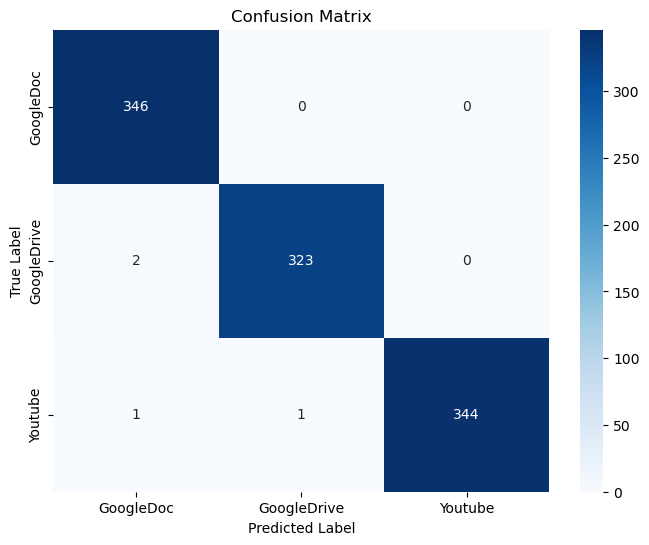

In [17]:
# Generate the confusion matrix
category_labels = ['GoogleDoc', 'GoogleDrive', 'Youtube']
conf_matrix = confusion_matrix(y_pool_test, y_pool_pred)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=category_labels, yticklabels=category_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Trustee Pooling

In [18]:
# Load the trained model
#svm_classifier = joblib.load('quic_text_svm_pca.joblib')
num_iter=50
num_stability_iter=10

trustee = ClassificationTrustee(expert=svm_pooling_classifier)
trustee.fit(X_pool_train, y_pool_train, num_iter=num_iter, num_stability_iter=num_stability_iter, samples_size=0.3, verbose=True)
dt, pruned_dt, agreement, reward = trustee.explain()
dt_y_pred = dt.predict(X_pool_test)
pruned_dt_y_pred = pruned_dt.predict(X_pool_test)

all_trees = trustee.get_all_students()

print("Model explanation global fidelity report:")
print(classification_report(y_pool_pred, dt_y_pred))
print("Model explanation score report:")
print(classification_report(y_pool_test, dt_y_pred))

Initializing training dataset using SVC(kernel='linear') as expert model
Expert model score: 0.9994231262232148
Initializing Trustee outer-loop with 10 iterations
########## Outer-loop Iteration 0/10 ##########
Initializing Trustee inner-loop with 10 iterations
########## Inner-loop Iteration 0/50 ##########
Sampling 498 points from training dataset with (1660, 1660) entries
Student model 0-0 trained with depth 5 and 11 leaves:
Student model score: 0.9595028067361667
Student model 0-0 fidelity: 0.9595028067361667
########## Inner-loop Iteration 1/50 ##########
Sampling 498 points from training dataset with (1810, 1810) entries
Student model 0-1 trained with depth 5 and 11 leaves:
Student model score: 0.9717770698902773
Student model 0-1 fidelity: 0.9717770698902773
########## Inner-loop Iteration 2/50 ##########
Sampling 498 points from training dataset with (1960, 1960) entries
Student model 0-2 trained with depth 6 and 15 leaves:
Student model score: 0.9393041482819978
Student model 

Student model 0-30 fidelity: 0.9530600118835414
########## Inner-loop Iteration 31/50 ##########
Sampling 498 points from training dataset with (6310, 6310) entries
Student model 0-31 trained with depth 5 and 13 leaves:
Student model score: 0.9936092955700798
Student model 0-31 fidelity: 0.9936092955700798
########## Inner-loop Iteration 32/50 ##########
Sampling 498 points from training dataset with (6460, 6460) entries
Student model 0-32 trained with depth 7 and 12 leaves:
Student model score: 0.9416332660267489
Student model 0-32 fidelity: 0.9416332660267489
########## Inner-loop Iteration 33/50 ##########
Sampling 498 points from training dataset with (6610, 6610) entries
Student model 0-33 trained with depth 7 and 13 leaves:
Student model score: 0.9035019700551615
Student model 0-33 fidelity: 0.9035019700551615
########## Inner-loop Iteration 34/50 ##########
Sampling 498 points from training dataset with (6760, 6760) entries
Student model 0-34 trained with depth 5 and 11 leaves:


Student model 1-12 trained with depth 7 and 13 leaves:
Student model score: 0.9668733590302216
Student model 1-12 fidelity: 0.9668733590302216
########## Inner-loop Iteration 13/50 ##########
Sampling 498 points from training dataset with (11110, 11110) entries
Student model 1-13 trained with depth 7 and 12 leaves:
Student model score: 0.924331987940846
Student model 1-13 fidelity: 0.924331987940846
########## Inner-loop Iteration 14/50 ##########
Sampling 498 points from training dataset with (11260, 11260) entries
Student model 1-14 trained with depth 6 and 11 leaves:
Student model score: 0.9535185604773234
Student model 1-14 fidelity: 0.9535185604773234
########## Inner-loop Iteration 15/50 ##########
Sampling 498 points from training dataset with (11410, 11410) entries
Student model 1-15 trained with depth 7 and 14 leaves:
Student model score: 0.9467947849861176
Student model 1-15 fidelity: 0.9467947849861176
########## Inner-loop Iteration 16/50 ##########
Sampling 498 points from

Student model 1-43 fidelity: 0.9253442995670241
########## Inner-loop Iteration 44/50 ##########
Sampling 498 points from training dataset with (15760, 15760) entries
Student model 1-44 trained with depth 6 and 11 leaves:
Student model score: 0.9797799422799423
Student model 1-44 fidelity: 0.9797799422799423
########## Inner-loop Iteration 45/50 ##########
Sampling 498 points from training dataset with (15910, 15910) entries
Student model 1-45 trained with depth 8 and 15 leaves:
Student model score: 0.9607042038132318
Student model 1-45 fidelity: 0.9607042038132318
########## Inner-loop Iteration 46/50 ##########
Sampling 498 points from training dataset with (16060, 16060) entries
Student model 1-46 trained with depth 6 and 13 leaves:
Student model score: 0.97316243770126
Student model 1-46 fidelity: 0.97316243770126
########## Inner-loop Iteration 47/50 ##########
Sampling 498 points from training dataset with (16210, 16210) entries
Student model 1-47 trained with depth 7 and 13 leav

Student model 2-25 trained with depth 6 and 14 leaves:
Student model score: 0.9411172553021077
Student model 2-25 fidelity: 0.9411172553021077
########## Inner-loop Iteration 26/50 ##########
Sampling 498 points from training dataset with (20560, 20560) entries
Student model 2-26 trained with depth 7 and 15 leaves:
Student model score: 0.8929738562091503
Student model 2-26 fidelity: 0.8929738562091503
########## Inner-loop Iteration 27/50 ##########
Sampling 498 points from training dataset with (20710, 20710) entries
Student model 2-27 trained with depth 7 and 12 leaves:
Student model score: 0.9207005866546766
Student model 2-27 fidelity: 0.9207005866546766
########## Inner-loop Iteration 28/50 ##########
Sampling 498 points from training dataset with (20860, 20860) entries
Student model 2-28 trained with depth 7 and 11 leaves:
Student model score: 0.9797373682918881
Student model 2-28 fidelity: 0.9797373682918881
########## Inner-loop Iteration 29/50 ##########
Sampling 498 points fr

Student model 3-6 fidelity: 0.9594627594627595
########## Inner-loop Iteration 7/50 ##########
Sampling 498 points from training dataset with (25210, 25210) entries
Student model 3-7 trained with depth 8 and 13 leaves:
Student model score: 0.9091238235670795
Student model 3-7 fidelity: 0.9091238235670795
########## Inner-loop Iteration 8/50 ##########
Sampling 498 points from training dataset with (25360, 25360) entries
Student model 3-8 trained with depth 7 and 14 leaves:
Student model score: 0.9662261471133292
Student model 3-8 fidelity: 0.9662261471133292
########## Inner-loop Iteration 9/50 ##########
Sampling 498 points from training dataset with (25510, 25510) entries
Student model 3-9 trained with depth 7 and 10 leaves:
Student model score: 0.9776629342520815
Student model 3-9 fidelity: 0.9776629342520815
########## Inner-loop Iteration 10/50 ##########
Sampling 498 points from training dataset with (25660, 25660) entries
Student model 3-10 trained with depth 6 and 14 leaves:
St

Student model 3-38 fidelity: 0.9462618034046605
########## Inner-loop Iteration 39/50 ##########
Sampling 498 points from training dataset with (30010, 30010) entries
Student model 3-39 trained with depth 8 and 14 leaves:
Student model score: 0.9355089355089355
Student model 3-39 fidelity: 0.9355089355089355
########## Inner-loop Iteration 40/50 ##########
Sampling 498 points from training dataset with (30160, 30160) entries
Student model 3-40 trained with depth 6 and 10 leaves:
Student model score: 0.9648807932689248
Student model 3-40 fidelity: 0.9648807932689248
########## Inner-loop Iteration 41/50 ##########
Sampling 498 points from training dataset with (30310, 30310) entries
Student model 3-41 trained with depth 6 and 12 leaves:
Student model score: 0.9255394059763474
Student model 3-41 fidelity: 0.9255394059763474
########## Inner-loop Iteration 42/50 ##########
Sampling 498 points from training dataset with (30460, 30460) entries
Student model 3-42 trained with depth 6 and 12 

Student model 4-20 trained with depth 7 and 12 leaves:
Student model score: 0.9528989139515455
Student model 4-20 fidelity: 0.9528989139515455
########## Inner-loop Iteration 21/50 ##########
Sampling 498 points from training dataset with (34810, 34810) entries
Student model 4-21 trained with depth 7 and 12 leaves:
Student model score: 0.9411199508051808
Student model 4-21 fidelity: 0.9411199508051808
########## Inner-loop Iteration 22/50 ##########
Sampling 498 points from training dataset with (34960, 34960) entries
Student model 4-22 trained with depth 5 and 10 leaves:
Student model score: 0.9540349113670469
Student model 4-22 fidelity: 0.9540349113670469
########## Inner-loop Iteration 23/50 ##########
Sampling 498 points from training dataset with (35110, 35110) entries
Student model 4-23 trained with depth 8 and 13 leaves:
Student model score: 0.9457411645054665
Student model 4-23 fidelity: 0.9457411645054665
########## Inner-loop Iteration 24/50 ##########
Sampling 498 points fr

Student model 5-1 trained with depth 6 and 11 leaves:
Student model score: 0.9322305764411026
Student model 5-1 fidelity: 0.9322305764411026
########## Inner-loop Iteration 2/50 ##########
Sampling 498 points from training dataset with (39460, 39460) entries
Student model 5-2 trained with depth 8 and 14 leaves:
Student model score: 0.9475319242668617
Student model 5-2 fidelity: 0.9475319242668617
########## Inner-loop Iteration 3/50 ##########
Sampling 498 points from training dataset with (39610, 39610) entries
Student model 5-3 trained with depth 6 and 10 leaves:
Student model score: 0.952543805504118
Student model 5-3 fidelity: 0.952543805504118
########## Inner-loop Iteration 4/50 ##########
Sampling 498 points from training dataset with (39760, 39760) entries
Student model 5-4 trained with depth 7 and 11 leaves:
Student model score: 0.916255674150411
Student model 5-4 fidelity: 0.916255674150411
########## Inner-loop Iteration 5/50 ##########
Sampling 498 points from training data

Student model 5-33 trained with depth 6 and 10 leaves:
Student model score: 0.9465199413098574
Student model 5-33 fidelity: 0.9465199413098574
########## Inner-loop Iteration 34/50 ##########
Sampling 498 points from training dataset with (44260, 44260) entries
Student model 5-34 trained with depth 5 and 12 leaves:
Student model score: 0.9582433244391337
Student model 5-34 fidelity: 0.9582433244391337
########## Inner-loop Iteration 35/50 ##########
Sampling 498 points from training dataset with (44410, 44410) entries
Student model 5-35 trained with depth 6 and 13 leaves:
Student model score: 0.9723537493872422
Student model 5-35 fidelity: 0.9723537493872422
########## Inner-loop Iteration 36/50 ##########
Sampling 498 points from training dataset with (44560, 44560) entries
Student model 5-36 trained with depth 7 and 17 leaves:
Student model score: 0.9263120134926499
Student model 5-36 fidelity: 0.9263120134926499
########## Inner-loop Iteration 37/50 ##########
Sampling 498 points fr

Student model 6-14 fidelity: 0.9665813363817123
########## Inner-loop Iteration 15/50 ##########
Sampling 498 points from training dataset with (48910, 48910) entries
Student model 6-15 trained with depth 7 and 12 leaves:
Student model score: 0.9592308881237774
Student model 6-15 fidelity: 0.9592308881237774
########## Inner-loop Iteration 16/50 ##########
Sampling 498 points from training dataset with (49060, 49060) entries
Student model 6-16 trained with depth 6 and 13 leaves:
Student model score: 0.9260879731697867
Student model 6-16 fidelity: 0.9260879731697867
########## Inner-loop Iteration 17/50 ##########
Sampling 498 points from training dataset with (49210, 49210) entries
Student model 6-17 trained with depth 6 and 15 leaves:
Student model score: 0.946020224016776
Student model 6-17 fidelity: 0.946020224016776
########## Inner-loop Iteration 18/50 ##########
Sampling 498 points from training dataset with (49360, 49360) entries
Student model 6-18 trained with depth 8 and 17 le

Student model 6-46 fidelity: 0.9786096256684492
########## Inner-loop Iteration 47/50 ##########
Sampling 498 points from training dataset with (53710, 53710) entries
Student model 6-47 trained with depth 7 and 13 leaves:
Student model score: 0.9407880353368908
Student model 6-47 fidelity: 0.9407880353368908
########## Inner-loop Iteration 48/50 ##########
Sampling 498 points from training dataset with (53860, 53860) entries
Student model 6-48 trained with depth 7 and 14 leaves:
Student model score: 0.9531991744066047
Student model 6-48 fidelity: 0.9531991744066047
########## Inner-loop Iteration 49/50 ##########
Sampling 498 points from training dataset with (54010, 54010) entries
Student model 6-49 trained with depth 8 and 14 leaves:
Student model score: 0.9553988338532604
Student model 6-49 fidelity: 0.9553988338532604
########## Outer-loop Iteration 7/10 ##########
Initializing Trustee inner-loop with 10 iterations
########## Inner-loop Iteration 0/50 ##########
Sampling 498 points

Student model 7-28 trained with depth 6 and 13 leaves:
Student model score: 0.9332156344474374
Student model 7-28 fidelity: 0.9332156344474374
########## Inner-loop Iteration 29/50 ##########
Sampling 498 points from training dataset with (58510, 58510) entries
Student model 7-29 trained with depth 6 and 15 leaves:
Student model score: 0.9485616723219389
Student model 7-29 fidelity: 0.9485616723219389
########## Inner-loop Iteration 30/50 ##########
Sampling 498 points from training dataset with (58660, 58660) entries
Student model 7-30 trained with depth 8 and 14 leaves:
Student model score: 0.9384389772493047
Student model 7-30 fidelity: 0.9384389772493047
########## Inner-loop Iteration 31/50 ##########
Sampling 498 points from training dataset with (58810, 58810) entries
Student model 7-31 trained with depth 8 and 15 leaves:
Student model score: 0.9242497783075186
Student model 7-31 fidelity: 0.9242497783075186
########## Inner-loop Iteration 32/50 ##########
Sampling 498 points fr

Student model 8-9 fidelity: 0.9449228359312087
########## Inner-loop Iteration 10/50 ##########
Sampling 498 points from training dataset with (63160, 63160) entries
Student model 8-10 trained with depth 5 and 11 leaves:
Student model score: 0.952152378622967
Student model 8-10 fidelity: 0.952152378622967
########## Inner-loop Iteration 11/50 ##########
Sampling 498 points from training dataset with (63310, 63310) entries
Student model 8-11 trained with depth 8 and 19 leaves:
Student model score: 0.9383333333333334
Student model 8-11 fidelity: 0.9383333333333334
########## Inner-loop Iteration 12/50 ##########
Sampling 498 points from training dataset with (63460, 63460) entries
Student model 8-12 trained with depth 5 and 10 leaves:
Student model score: 0.9523811435806424
Student model 8-12 fidelity: 0.9523811435806424
########## Inner-loop Iteration 13/50 ##########
Sampling 498 points from training dataset with (63610, 63610) entries
Student model 8-13 trained with depth 7 and 15 lea

Student model 8-41 trained with depth 7 and 11 leaves:
Student model score: 0.9534636652400841
Student model 8-41 fidelity: 0.9534636652400841
########## Inner-loop Iteration 42/50 ##########
Sampling 498 points from training dataset with (67960, 67960) entries
Student model 8-42 trained with depth 6 and 12 leaves:
Student model score: 0.8903238360048652
Student model 8-42 fidelity: 0.8903238360048652
########## Inner-loop Iteration 43/50 ##########
Sampling 498 points from training dataset with (68110, 68110) entries
Student model 8-43 trained with depth 7 and 15 leaves:
Student model score: 0.9596003898635478
Student model 8-43 fidelity: 0.9596003898635478
########## Inner-loop Iteration 44/50 ##########
Sampling 498 points from training dataset with (68260, 68260) entries
Student model 8-44 trained with depth 6 and 14 leaves:
Student model score: 0.9658518660854849
Student model 8-44 fidelity: 0.9658518660854849
########## Inner-loop Iteration 45/50 ##########
Sampling 498 points fr

Student model 9-22 fidelity: 0.9592627341787475
########## Inner-loop Iteration 23/50 ##########
Sampling 498 points from training dataset with (72610, 72610) entries
Student model 9-23 trained with depth 7 and 12 leaves:
Student model score: 0.9870440251572328
Student model 9-23 fidelity: 0.9870440251572328
########## Inner-loop Iteration 24/50 ##########
Sampling 498 points from training dataset with (72760, 72760) entries
Student model 9-24 trained with depth 7 and 12 leaves:
Student model score: 0.9723835860106771
Student model 9-24 fidelity: 0.9723835860106771
########## Inner-loop Iteration 25/50 ##########
Sampling 498 points from training dataset with (72910, 72910) entries
Student model 9-25 trained with depth 7 and 14 leaves:
Student model score: 0.9457389793524246
Student model 9-25 fidelity: 0.9457389793524246
########## Inner-loop Iteration 26/50 ##########
Sampling 498 points from training dataset with (73060, 73060) entries
Student model 9-26 trained with depth 7 and 14 

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Model explanation global fidelity report:
              precision    recall  f1-score   support

   GoogleDoc       0.98      0.97      0.97       349
 GoogleDrive       0.95      0.98      0.96       324
     Youtube       0.96      0.95      0.96       344

    accuracy                           0.96      1017
   macro avg       0.96      0.96      0.96      1017
weighted avg       0.96      0.96      0.96      1017

Model explanation score report:
              precision    recall  f1-score   support

   GoogleDoc       0.97      0.97      0.97       346
 GoogleDrive       0.95      0.97      0.96       325
     Youtube       0.97      0.95      0.96       346

    accuracy                           0.96      1017
   macro avg       0.96      0.96      0.96      1017
weighted avg       0.96      0.96      0.96      1017



C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [29]:
# Load the trained model
#svm_classifier = joblib.load('quic_text_svm_pca.joblib')

trustee = ClassificationTrustee(expert=svm_pooling_classifier)
trustee.fit(X_pool_train, y_pool_train, num_iter=10, num_stability_iter=5, samples_size=0.3, verbose=True)
dt, pruned_dt, agreement, reward = trustee.explain()
dt_y_pred = dt.predict(X_pool_test)
pruned_dt_y_pred = pruned_dt.predict(X_pool_test)

print("Model explanation global fidelity report:")
print(classification_report(y_pool_pred, dt_y_pred))
print("Model explanation score report:")
print(classification_report(y_pool_test, dt_y_pred))

Initializing training dataset using SVC(kernel='linear') as expert model
Expert model score: 1.0
Initializing Trustee outer-loop with 5 iterations
########## Outer-loop Iteration 0/5 ##########
Initializing Trustee inner-loop with 5 iterations
########## Inner-loop Iteration 0/10 ##########
Sampling 498 points from training dataset with (1660, 1660) entries
Student model 0-0 trained with depth 5 and 13 leaves:
Student model score: 0.9125916591528793
Student model 0-0 fidelity: 0.9125916591528793
########## Inner-loop Iteration 1/10 ##########
Sampling 498 points from training dataset with (1810, 1810) entries
Student model 0-1 trained with depth 6 and 10 leaves:
Student model score: 0.9928015790084755
Student model 0-1 fidelity: 0.9928015790084755
########## Inner-loop Iteration 2/10 ##########
Sampling 498 points from training dataset with (1960, 1960) entries
Student model 0-2 trained with depth 6 and 12 leaves:
Student model score: 0.9505279989779546
Student model 0-2 fidelity: 0.95

Student model 3-0 trained with depth 6 and 12 leaves:
Student model score: 0.964514338707887
Student model 3-0 fidelity: 0.964514338707887
########## Inner-loop Iteration 1/10 ##########
Sampling 498 points from training dataset with (6310, 6310) entries
Student model 3-1 trained with depth 7 and 11 leaves:
Student model score: 0.9593435475327002
Student model 3-1 fidelity: 0.9593435475327002
########## Inner-loop Iteration 2/10 ##########
Sampling 498 points from training dataset with (6460, 6460) entries
Student model 3-2 trained with depth 5 and 8 leaves:
Student model score: 0.9734609969249063
Student model 3-2 fidelity: 0.9734609969249063
########## Inner-loop Iteration 3/10 ##########
Sampling 498 points from training dataset with (6610, 6610) entries
Student model 3-3 trained with depth 6 and 12 leaves:
Student model score: 0.9503165286297817
Student model 3-3 fidelity: 0.9503165286297817
########## Inner-loop Iteration 4/10 ##########
Sampling 498 points from training dataset w

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Model explanation global fidelity report:
              precision    recall  f1-score   support

   GoogleDoc       0.95      0.96      0.95       349
 GoogleDrive       0.96      0.99      0.97       324
     Youtube       0.96      0.91      0.93       344

    accuracy                           0.95      1017
   macro avg       0.95      0.95      0.95      1017
weighted avg       0.95      0.95      0.95      1017

Model explanation score report:
              precision    recall  f1-score   support

   GoogleDoc       0.94      0.97      0.96       346
 GoogleDrive       0.96      0.98      0.97       325
     Youtube       0.96      0.91      0.93       346

    accuracy                           0.95      1017
   macro avg       0.95      0.95      0.95      1017
weighted avg       0.95      0.95      0.95      1017



In [19]:
# Output decision tree to pdf
features = ['feature_{}'.format(MyFeature(i)) for i in range(1, 10001)]
classes = ['GoogleDoc', 'GoogleDrive', 'Youtube']

dot_data = tree.export_graphviz(
    dt,
    class_names=classes,
    feature_names= features,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph.render("flowpic_x,y_svm_pool")

# Output pruned decision tree to pdf
dot_data = tree.export_graphviz(
    pruned_dt,
    class_names=classes,
    feature_names=features,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph.render("flowpic_x,y_svm_pruned_pool")

'flowpic_x,y_svm_pruned_pool.pdf'

In [22]:
#num_iter=50
#num_stability_iter=10
#all_trees = trustee.get_all_students()

all_features = {}
i=0
for j in range(num_stability_iter):
    for dt, rev in all_trees[j]:
        dot_data = tree.export_graphviz(
            dt,
            class_names=classes,
            feature_names=features,
            filled=True,
            rounded=True,
            special_characters=True,)
        graph = graphviz.Source(dot_data)
        graph.render(f'svm_pool tree x,y {i}')    

        features_used, splits, branches = get_dt_info(dt)

        for feat in features_used:
            if feat not in all_features:
                all_features[feat] = {"feat_name": MyFeature(feat+1), "count_total": 0, "num_trees": 0, "samples": 0}

            all_features[feat]["count_total"] += features_used[feat]["count"]
            all_features[feat]["num_trees"] += 1
            all_features[feat]["samples"] += features_used[feat]["samples"]

        """
        print(f'tree {i}:')
        for feat in features_used:   
            print(f'feat: {feat+1}, count: {features_used[feat]["count"]}, samples: {features_used[feat]["samples"]}')
        """
        i+=1

print()
print("all tree:")    
for feat in all_features:   
     print(f'feat_name: ({all_features[feat]["feat_name"]}), count_total: {all_features[feat]["count_total"]}, num_trees: {all_features[feat]["num_trees"]}, samples: {all_features[feat]["samples"]}')


print()
sorted_features = sorted(all_features.items(), key=lambda x: (x[1]["num_trees"], x[1]["samples"]), reverse=True)
print("sorted features:")
for feat, data in sorted_features:
    print(f'feat_name: ({all_features[feat]["feat_name"]}), count_total: {data["count_total"]}, num_trees: {data["num_trees"]}, samples: {data["samples"]}')
    


all tree:
feat_name: (1485-1500,1425-1440), count_total: 201, num_trees: 196, samples: 42469
feat_name: (1425-1440,1425-1440), count_total: 18, num_trees: 18, samples: 2732
feat_name: (0-15,330-345), count_total: 284, num_trees: 283, samples: 38384
feat_name: (1485-1500,1395-1410), count_total: 264, num_trees: 263, samples: 35518
feat_name: (1470-1485,1290-1305), count_total: 28, num_trees: 28, samples: 3423
feat_name: (75-90,360-375), count_total: 1, num_trees: 1, samples: 6
feat_name: (1335-1350,1410-1425), count_total: 44, num_trees: 43, samples: 10591
feat_name: (1485-1500,90-105), count_total: 25, num_trees: 25, samples: 2011
feat_name: (1470-1485,510-525), count_total: 4, num_trees: 4, samples: 360
feat_name: (90-105,120-135), count_total: 17, num_trees: 17, samples: 1438
feat_name: (1410-1425,1425-1440), count_total: 22, num_trees: 22, samples: 3309
feat_name: (1485-1500,1305-1320), count_total: 31, num_trees: 31, samples: 3522
feat_name: (315-330,315-330), count_total: 3, num_